In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
type(mnist)

module

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
np.max(X_train)

255

In [10]:
np.mean(X_train)

72.94035223214286

In [11]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

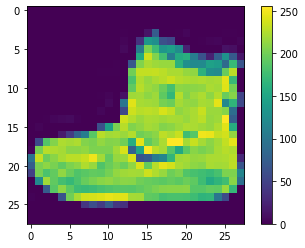

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
X_train = X_train/255.0

In [17]:
X_test = X_test/255.0

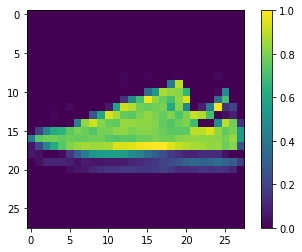

In [18]:
plt.figure()
plt.imshow(X_train[6])
plt.colorbar()

In [19]:
class_names[y_train[6]]

'sneaker'

### Building the model using TF 2.0

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [21]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.5691 - accuracy: 0.8042 - val_loss: 0.4289 - val_accuracy: 0.8528
Epoch 2/10
48000/48000 [==============================] - 2s 48us/sample - loss: 0.4063 - accuracy: 0.8565 - val_loss: 0.3849 - val_accuracy: 0.8650
Epoch 3/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3652 - accuracy: 0.8691 - val_loss: 0.3663 - val_accuracy: 0.8708
Epoch 4/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.3385 - accuracy: 0.8796 - val_loss: 0.3776 - val_accuracy: 0.8638
Epoch 5/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.3218 - accuracy: 0.8844 - val_loss: 0.3660 - val_accuracy: 0.8672
Epoch 6/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.3057 - accuracy: 0.8893 - val_loss: 0.3333 - val_accuracy: 0.8798
Epoch 7/10
48000/48000 [==============================] 

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_accuracy)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.3422 - accuracy: 0.8776
0.8776


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred = model.predict_classes(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.8776

In [29]:
pred = model.predict(X_test)

In [30]:
pred

array([[6.9113804e-07, 1.0620619e-07, 2.7830787e-05, ..., 3.3584319e-02,
        5.9412559e-05, 9.2041659e-01],
       [1.6531848e-06, 1.1028595e-11, 9.9835348e-01, ..., 5.8868688e-15,
        1.6908149e-09, 3.6625499e-17],
       [1.8223818e-05, 9.9997962e-01, 2.7020809e-07, ..., 3.4097780e-11,
        5.5433267e-09, 5.0910814e-10],
       ...,
       [2.0020946e-03, 9.6799397e-08, 1.1897455e-04, ..., 3.6579053e-07,
        9.9771583e-01, 6.2283727e-11],
       [1.6792374e-06, 9.9971849e-01, 1.4719985e-06, ..., 4.0273509e-08,
        1.3002384e-07, 1.4920938e-06],
       [4.2169726e-05, 5.1315806e-06, 1.6261888e-04, ..., 1.9154107e-03,
        9.4482471e-04, 9.8320643e-06]], dtype=float32)

In [31]:
pred[0]

array([6.9113804e-07, 1.0620619e-07, 2.7830787e-05, 1.4686725e-06,
       3.4876444e-07, 4.5888025e-02, 2.1228732e-05, 3.3584319e-02,
       5.9412559e-05, 9.2041659e-01], dtype=float32)

In [32]:
np.argmax(pred[0])

9

## Plotting Accuracy and Loss graph

In [33]:
history.history

{'loss': [0.5691339692721764,
  0.4063409574950735,
  0.36523400495449704,
  0.33854885706678034,
  0.3217802035311858,
  0.3057363292512794,
  0.29502048433447875,
  0.28299423223361375,
  0.2705168401201566,
  0.26314772247957685],
 'accuracy': [0.8041875,
  0.85647917,
  0.86908334,
  0.87960416,
  0.88441664,
  0.88927084,
  0.892875,
  0.8962917,
  0.9004375,
  0.9037708],
 'val_loss': [0.4289330666263898,
  0.3849077846854925,
  0.3662939523657163,
  0.3776216677079598,
  0.36604603119194506,
  0.3332754032065471,
  0.33365162536501886,
  0.32838681104282536,
  0.3257780823856592,
  0.31595450912912687],
 'val_accuracy': [0.85283333,
  0.865,
  0.87083334,
  0.8638333,
  0.86716664,
  0.87975,
  0.87833333,
  0.885,
  0.883,
  0.88816667]}

C:\Users\acer\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


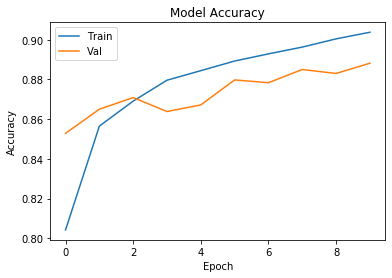

C:\Users\acer\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


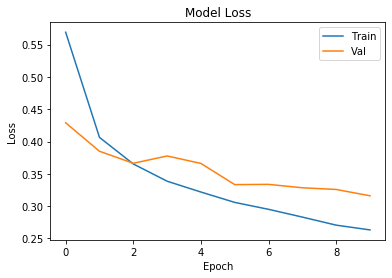

In [34]:
#plotting training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc='upper_left')
plt.show()

#plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc='upper_left')
plt.show()

## Plotting Confusion Matrix

In [35]:
!pip install mlxtend

In [37]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2ed7a7e8160>)

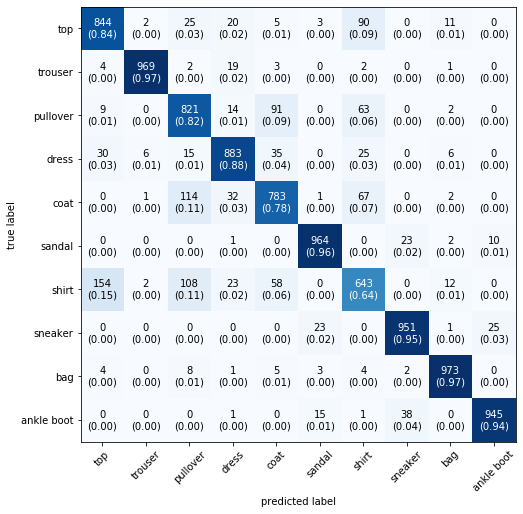

In [39]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8),class_names=class_names, show_normed=True)